<a href="https://colab.research.google.com/github/rdchkulasinghe/NLP/blob/main/Day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize,word_tokenize

In [ ]:
#Download resources if not already done
nltk.download("punkt")
nltk.download("punkt_tab")

#Example sentence
example_sentence = "Python programmers often tend like programming in python because it's like english."





[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
#1. Sentence Tokenization

sentences = sent_tokenize(example_sentence)
print("Sentence Tokens:")
for i, s in enumerate (sentences, 1):
      print(f"(i)s (s)")

Sentence Tokens:
(i)s (s)


In [ ]:
#2. Word Tokenization

words= word_tokenize(example_sentence)
print("\nWlord Tokens:")
print(words)


Wlord Tokens:
['Python', 'programmers', 'often', 'tend', 'like', 'programming', 'in', 'python', 'because', 'it', "'s", 'like', 'english', '.']


In [ ]:
import nltk

from nltk.stem import PorterStemmer

nltk.download("punkt")

ps= PorterStemmer()

example_words = ["program", "programming","programer", "programs", "programmed"]

#Perform stemming

print("{0:20}{1:20}".format("--Word--", "--Stem--"))

for word in example_words:
  print ("{0:20}{1:20}".format(word, ps.stem(word)))

--Word--            --Stem--            
program             program             
programming         program             
programer           program             
programs            program             
programmed          program             


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from nltk.stem import WordNetLemmatizer

nltk.download("wordnet")
nltk.download("omw-1.4")

wnl= WordNetLemmatizer()

# Example inflections to reduce
example_words = ["program","programming","programer", "programs", "programmed"]

# Perform lemmatization
print("{0:20}{1:20}".format("--Word--","--Lemma--"))
for word in example_words:
      print ("{0:20}{1:20}".format(word, wnl.lemmatize(word, pos="v")))

--Word--            --Lemma--           
program             program             
programming         program             
programer           programer           
programs            program             
programmed          program             


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
import nltk

import pandas as pd

import matplotlib.pyplot as plt

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize,sent_tokenize

from collections import Counter

In [ ]:
#1. Load Dataset

# Load with correct encoding (latin1 avoids Unicode errors)

text_dataset= pd.read_csv("/content/multilingual_mobile_app_reviews_2025.csv", encoding="latin1")

TEXT_COLUMN = text_dataset["review_text"]

In [ ]:
#2. Apply Tokenizers

#Sentence tokenization for all rows
text_dataset["sent_tokens"] = text_dataset ["review_text"].astype(str).apply(sent_tokenize)

#Ward tokenization for all rows
text_dataset["word_tokens"]=text_dataset["review_text"].astype(str).apply(word_tokenize)

#Check results
print("\nSample tokenization output:\n")
print(text_dataset[["sent_tokens", "word_tokens"]].head())


Sample tokenization output:

                                         sent_tokens  \
0  [Qui doloribus consequuntur., Perspiciatis tem...   
1  [Great app but too many ads, consider premium ...   
2  [The interface could be better but overall goo...   
3  [Latest update broke some features, please fix...   
4  [Perfect for daily use, highly recommend to ev...   

                                         word_tokens  
0  [Qui, doloribus, consequuntur, ., Perspiciatis...  
1  [Great, app, but, too, many, ads, ,, consider,...  
2  [The, interface, could, be, better, but, overa...  
3  [Latest, update, broke, some, features, ,, ple...  
4  [Perfect, for, daily, use, ,, highly, recommen...  


In [ ]:
#Flatten all word tokens into a single list

all_words= [word for tokens in text_dataset["word_tokens"] for word in tokens]


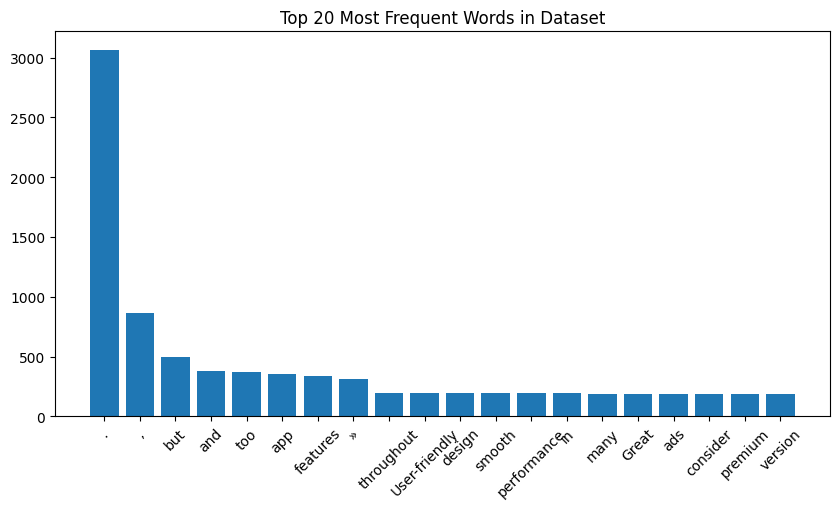

In [ ]:
#Count frequencies

word_freq= Counter(all_words)

#(a) Top 20 frequent words

most_common_words=word_freq.most_common(20)
words_, counts=zip(*most_common_words)

plt.figure(figsize=(10,5))
plt.bar(words_, counts)
plt.xticks (rotation=45)
plt.title("Top 20 Most Frequent Words in Dataset")
plt.show()

Text(0.5, 1.0, 'Word Cloud of Dataset')

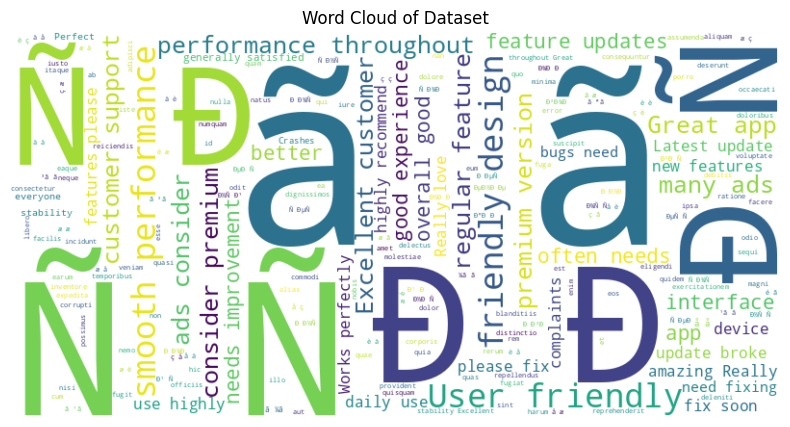

In [ ]:
# (b) Word Cloud

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(all_words))

plt.figure(figsize=(10,5))

plt.imshow(wordcloud, interpolation="bilinear")

plt.axis("off")

plt.title("Word Cloud of Dataset")

In [ ]:
from nltk.corpus import stopwords

nltk.download("punkt")
nltk.download("stopwords")

stop_words =set(stopwords.words("english"))

def remove_stopwords (tokens):
          return [word.lower() for word in tokens if word.lower() not in stop_words and word.isalpha()]

text_dataset["clean_tokens"] = text_dataset["word_tokens"].apply(remove_stopwords)

#Check results

print("\nSample tokenization with stopword removal:\n")
print(text_dataset[["word_tokens", "clean_tokens"]].head())


Sample tokenization with stopword removal:

                                         word_tokens  \
0  [Qui, doloribus, consequuntur, ., Perspiciatis...   
1  [Great, app, but, too, many, ads, ,, consider,...   
2  [The, interface, could, be, better, but, overa...   
3  [Latest, update, broke, some, features, ,, ple...   
4  [Perfect, for, daily, use, ,, highly, recommen...   

                                        clean_tokens  
0  [qui, doloribus, consequuntur, perspiciatis, t...  
1  [great, app, many, ads, consider, premium, ver...  
2  [interface, could, better, overall, good, expe...  
3  [latest, update, broke, features, please, fix,...  
4  [perfect, daily, use, highly, recommend, every...  


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


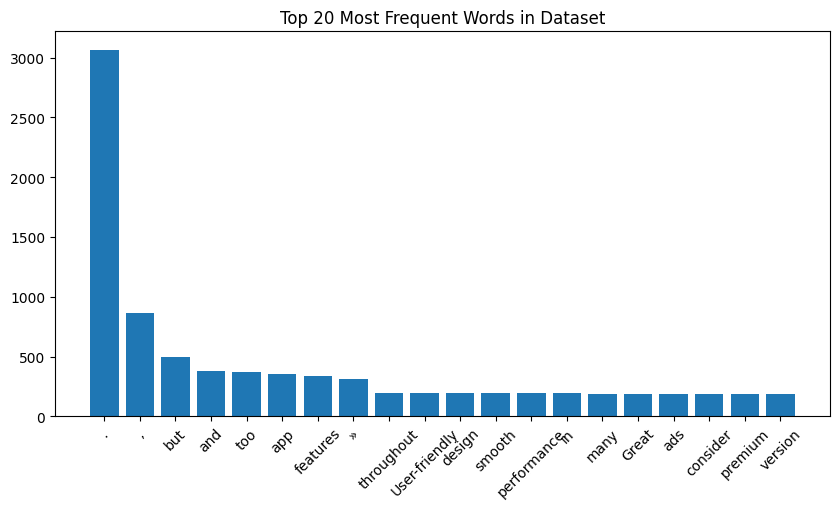

In [ ]:
#Count frequencies

word_freq= Counter(all_words)

#(a) Top 20 frequent words

most_common_words=word_freq.most_common(20)
words_, counts=zip(*most_common_words)

plt.figure(figsize=(10,5))
plt.bar(words_, counts)
plt.xticks (rotation=45)
plt.title("Top 20 Most Frequent Words in Dataset")
plt.show()

In [ ]:
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")

porter= PorterStemmer()
lemmatizer= WordNetLemmatizer()

text_dataset["stemmed_tokens"] = text_dataset["clean_tokens"].apply(
        lambda tokens: [porter.stem(w) for w in tokens])

text_dataset["lemmatized_tokens"] = text_dataset["clean_tokens"].apply(
        lambda tokens: [lemmatizer.lemmatize(w) for w in tokens])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Byte level Processing

In [ ]:
from tokenizers import ByteLevelBPETokenizer
import os

# 1. Extract review_text, drop missing
texts = text_dataset["review_text"].dropna().astype(str).tolist()

# 2. Save to a single text file
corpus_path = "/content/multilingual_mobile_app_reviews_2025.csv"
with open(corpus_path, "w", encoding="utf-8") as f:
    for line in texts:
        f.write(line.strip() + "\n")

# 3. Initialize tokenizer
tokenizer = ByteLevelBPETokenizer()

# 4. Train on the corpus
tokenizer.train(
    files=[corpus_path],
    vocab_size=30000,
    min_frequency=2,
    special_tokens=["<s>", "</s>", "<pad>", "<unk>", "<mask>"]
)

# 5. Save the trained tokenizer
out_dir = "/mnt/data/bytelevel_tokenizer"
os.makedirs(out_dir, exist_ok=True)
tokenizer.save_model(out_dir)

print(f"Tokenizer trained and saved to {out_dir}")

Tokenizer trained and saved to /mnt/data/bytelevel_tokenizer
